# Heat Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the initial-boundary value problem

$$
\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2} \ , \ \ 0 \leq x \leq L \ , \ \ t \geq 0 \ , \ \ \alpha \in \mathbb{R}
$$

with boundary conditions $u(0,t) = T_0$ and $u(L,t) = T_L$, and initial condition $u(x,0) = f(x)$. We assume that $f(0) = T_0$ and $f(L) = T_L$.

## Discretization

Choose the number of steps $N$ in the $x$ direction and the number of steps $M$ in the $t$ diection. These choices determine the step size $h$ in the $x$ direction, the step size $k$ in the $t$ direction and create a grid of points:

$$
\begin{align}
x_i &= ih \ , \ \ i = 0,1, \dots, N+1 \ , \ \ h = \frac{L}{N + 1} \\
t_j &= jk \ , \ \ j = 0,1, \dots, M \ , \ \ k=\frac{t_f}{M}
\end{align}
$$

Here we have chosen some final time value $t_f$ so that the grid is a finite rectangle $[0,L] \times [0,t_f]$. The goal of a finite difference method is to compute the matrix

$$
U = [u_{i,j}]
$$

which gives approximations of the solution $u(x,t)$ at the grid points:

$$
u_{i,j} \approx u(x_i,t_j) = u(ih,jk)
$$

where $x_0 = 0$, $x_{N+1}= L$, $t_0 = 0$ and $t_M = t_f$.

## Formulation

Apply the forward difference formula for $u_t$ at position $x_i$ and time $t_j$

$$
\begin{align*}
u_t(x_i,t_j) &= \frac{u(x_i,t_{j+1}) - u(x_i,t_j)}{k} + O(k) \\
&= \frac{u_{i,j+1} - u_{i,j}}{k} + O(k)
\end{align*}
$$

Apply the central difference formula for $u_{xx}$ at position $x_i$ and time $t_j$

$$
\begin{align*}
u_{xx}(x_i,t_j) &= \frac{u(x_{i+1},t_j) - 2u(x_i,t_j) + u(x_{i-1},t_j)}{h^2} + O(h^2) \\
&= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + O(h^2)
\end{align*}
$$

Plug the formulas into the heat equation at position $x_i$ and time $t_j$

$$
\begin{align*}
u_t(x_i,t_j) &= \alpha u_{xx}(x_i,t_j) \\
\frac{u_{i,j+1} - u_{i,j}}{k}
&=
\alpha \left( \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} \right)
\end{align*}
$$

Rearrange to solve for $u_{i,j+1}$

$$
u_{i,j+1} = r u_{i-1,j} + (1 - 2r) u_{i,j} + r u_{i+1,j} \ \ , \ \ r = \frac{\alpha k}{h^2}
$$

Write out the equations

$$
\begin{array}{cccccccccccccc}
u_{1,j+1} & = & (1 - 2r) u_{1,j}  & + & \, u_{2,j}  &  & &  & & & & + & r \, T_0 \\
u_{2,j+1} & = & r \, u_{1,j} & +  & (1 - 2r) u_{2,j}  & +  & r \, u_{3,j} & & & & & & \\
%u_{3,j+1} & = & & & r \, u_{2,j}  & +  & (1 - 2r) u_{3,j}  & + & r \, u_{4,j} & & & &  \\
 & \vdots &  & &  & & \vdots &  & & &  & \vdots & \\
u_{N-1,j+1} & = & & & & & r \, u_{N-2,j}  & +  & (1 - 2r) u_{N-1,j}  & +  & r u_{N,j} & & \\
u_{N,j+1} & = & & & & & & & r \, u_{N-1,j}  & +  & (1 - 2r) u_{N,j}  & +  & r \, T_L
\end{array}
$$

These finite difference equations show us that approximations at time $t_{j+1}$ are given by matrix multiplication of the vector of approximations at time $t_j$. Therefore we can write the FTCS method as an iterative matrix formula.

## Matrix Notation

The forward time central space (FTCS) method for the heat equation is given by the iterative matrix formula

$$
\boldsymbol{u}_{j+1} = A \boldsymbol{u}_j + \boldsymbol{g}_j
$$

where

$$
A = 
\left[
\begin{array}{ccccc}
1 - 2r & r & & & \\
r & 1 - 2r & r & & \\
& & \ddots & & \\
& & r & 1 - 2r & r \\
& & & r & 1 - 2r \\
\end{array}
\right]
$$

$$
\boldsymbol{u}_j = \begin{bmatrix} u_{1,j} \\ u_{2,j} \\ \vdots \\ u_{N-1,j} \\ u_{N,j} \end{bmatrix}
\ \ \ \ \
\boldsymbol{g}_j =
\begin{bmatrix} r T_0 \\ 0 \\ \vdots \\ 0 \\ r T_L \end{bmatrix}
\ \ \ \ \
r = \frac{\alpha k}{h^2}
$$

The algorithm produces the matrix of approximations

$$
U =  [u_{i,j}] = \begin{bmatrix} & & & \\ \boldsymbol{u}_1 & \boldsymbol{u}_2 & \cdots & \boldsymbol{u}_M \\ & & & \end{bmatrix}
\ \ , \ \ \
u_{i,j} \approx u(x_i,t_j)
$$

starting from the initial condition

$$
\boldsymbol{u}_0 = \begin{bmatrix} u_{1,0} \\ u_{2,0} \\ \vdots \\ u_{N,0} \end{bmatrix}
= \begin{bmatrix} F(x_1) \\ F(x_2) \\ \vdots \\ F(x_N) \end{bmatrix}
$$

## Implementation

In [36]:
def heatFTCS(alpha,L,f,tf,N,M):
    h = L/(N + 1)
    k = tf/M
    x = np.linspace(0,L,N+2)
    t = np.linspace(0,tf,M+1)
    u = np.zeros((N+2,M+1))
    u[:,0] = f(x)
    u[0,:] = f(0)
    u[-1,:] = f(L)
    r = alpha*k/h**2
    A = (1 - 2*r)*np.eye(N+2) + r*np.diag(np.ones(N+1),1) + r*np.diag(np.ones(N+1),-1)
    A[0,[0,1]] = [1.,0.]; A[-1,[-2,-1]] = [0.,1.];
    for j in range(M):
        u[:,j+1] = A@u[:,j]
    return u

## Example

Consider $\alpha = 0.1$, $L = 1$, $f(x) = x(1-x)$ and $t_f = 1$.

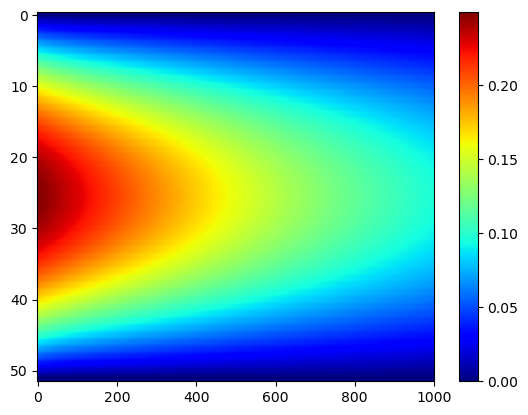

In [33]:
u = heatFTCS(0.1,1,lambda x: x*(1 - x),1,50,1000)
plt.imshow(u,aspect='auto',cmap='jet'), plt.colorbar()
plt.show()